In [1]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
from datetime import datetime
import datetime as dt
import os

The code begins by importing necessary libraries and modules such as pandas, numpy, openpyxl, datetime, and os. It also mounts the Google Drive to access files from Google Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/History and Forecast"

#Above line sets the path variable to the directory path where the Excel files are located.

columns = ["Actual Date", "Business Date", "Rooms Sold", "Rooms for Sale", "Arrival Rooms", "Compliment Rooms", "House Use", "Hold", "Individual Confirm", "Individual Tentative", "Group Confirm", "Group Tentative", "Occupancy %", "Room Revenue", "ARR", "Inclusion Revenue", "Departure Rooms", "OOO Rooms", "Pax", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue", "Confirmed Group ARR", "Tentative Group Revenue", "Tentative Group ARR", "Total Room Inventory"]
df = pd.DataFrame(columns=columns)

#Here, a DataFrame named 'df' is created with the specified column names. This DataFrame will store the data extracted from Excel files.

for filename in os.listdir(path):
  if filename.endswith(".xlsx"):
    filepath = os.path.join(path, filename)
    wb = load_workbook(filename=filepath, read_only=True)
    ws = wb.active

    actual_date_str = ws.cell(row=8, column=1).value
    actual_date = actual_date_str.strftime("%Y-%m-%d")

    for row in ws.iter_rows(min_row=8, max_row=ws.max_row, min_col=1, max_col=26, values_only=True):
      if isinstance(row[0], (datetime, pd.Timestamp)):
        business_date = row[0].strftime("%Y-%m-%d")
        row_dict = {"Actual Date": actual_date, "Business Date": business_date}

        # Add the data from columns C to Z to the dictionary
        for i in range(2, 26):
          row_dict[columns[i]] = row[i]

        # Append the row data to the dataframe
        df = pd.concat([df, pd.DataFrame([row_dict])], ignore_index=True)

# Print the resulting dataframe
print(df)

      Actual Date Business Date Rooms Sold Rooms for Sale Arrival Rooms  \
0      2023-02-06    2023-02-06        101             12            68   
1      2023-02-06    2023-02-07        113              3            31   
2      2023-02-06    2023-02-08        114              3            34   
3      2023-02-06    2023-02-09        115              0            36   
4      2023-02-06    2023-02-10        109              7            51   
...           ...           ...        ...            ...           ...   
31837  2023-05-05    2024-04-30          2            121             2   
31838  2023-05-05    2024-05-01          4            119             2   
31839  2023-05-05    2024-05-02          0            123             0   
31840  2023-05-05    2024-05-03          0            123             0   
31841  2023-05-05    2024-05-04          1            122             1   

      Compliment Rooms House Use Hold Individual Confirm Individual Tentative  \
0                 

The above block of code iterates through each file in the specified directory. It reads only the Excel files (with ".xlsx" extension). For each file, it loads the workbook, accesses the active sheet, and retrieves the actual date and business date from specific cells.

Then, it iterates through each row of the sheet, starting from row 8. It checks if the first column of the row contains a valid date. If it does, it creates a dictionary, 'row_dict', to store the data. The data from columns C to Z of the current row is added to 'row_dict'. Finally, the row data is appended to the 'df' DataFrame.

In [4]:
#These lines convert the 'Actual Date' and 'Business Date' columns of the 'df' DataFrame to datetime format using the pd.to_datetime function. The modified DataFrame is then displayed.
df['Actual Date'] = pd.to_datetime(df['Actual Date'])
df['Business Date'] = pd.to_datetime(df['Business Date'])
df 

,Actual Date,Business Date,Rooms Sold,Rooms for Sale,Arrival Rooms,Compliment Rooms,House Use,Hold,Individual Confirm,Individual Tentative,...,Departure Rooms,OOO Rooms,Pax,Individual Revenue,Individual ARR,Confirmed Group Revenue,Confirmed Group ARR,Tentative Group Revenue,Tentative Group ARR,Total Room Inventory
0,2023-02-06,2023-02-06,101,12,68,2,3,0,34,26,...,29,12,181,731411.39,12190.19,587105.96,14319.66,0,0,118
1,2023-02-06,2023-02-07,113,3,31,2,2,0,34,32,...,20,10,188,824954.22,12499.31,653105.96,14513.47,0,0,120
2,2023-02-06,2023-02-08,114,3,34,2,2,0,32,40,...,33,9,193,909711.69,12634.88,594241.54,15236.96,0,0,121
3,2023-02-06,2023-02-09,115,0,36,2,2,0,26,44,...,35,11,202,865637.91,12366.26,620894.08,18814.97,0,0,119
4,2023-02-06,2023-02-10,109,7,51,2,2,0,34,41,...,57,10,213,992517.19,13233.56,440242.19,62891.74,0,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31837,2023-05-05,2024-04-30,2,121,2,0,0,0,0,2,...,0,7,4,15386.44,7693.22,0.00,0.00,0,0,123
31838,2023-05-05,2024-05-01,4,119,2,0,0,0,0,4,...,0,7,8,30772.88,7693.22,0.00,0.00,0,0,123
31839,2023-05-05,2024-05-02,0,123,0,0,0,0,0,0,...,4,7,1,0.00,0.00,0.00,0.00,0,0,123
31840,2023-05-05,2024-05-03,0,123,0,0,0,0,0,0,...,0,7,1,0.00,0.00,0.00,0.00,0,0,123


In [5]:
# Filter the dataframe to keep only rows whose dates are on or before 5-5-2023
df = df[df['Business Date'] <= pd.Timestamp(2023, 5, 5)]
df

,Actual Date,Business Date,Rooms Sold,Rooms for Sale,Arrival Rooms,Compliment Rooms,House Use,Hold,Individual Confirm,Individual Tentative,...,Departure Rooms,OOO Rooms,Pax,Individual Revenue,Individual ARR,Confirmed Group Revenue,Confirmed Group ARR,Tentative Group Revenue,Tentative Group ARR,Total Room Inventory
0,2023-02-06,2023-02-06,101,12,68,2,3,0,34,26,...,29,12,181,731411.39,12190.19,587105.96,14319.66,0,0,118
1,2023-02-06,2023-02-07,113,3,31,2,2,0,34,32,...,20,10,188,824954.22,12499.31,653105.96,14513.47,0,0,120
2,2023-02-06,2023-02-08,114,3,34,2,2,0,32,40,...,33,9,193,909711.69,12634.88,594241.54,15236.96,0,0,121
3,2023-02-06,2023-02-09,115,0,36,2,2,0,26,44,...,35,11,202,865637.91,12366.26,620894.08,18814.97,0,0,119
4,2023-02-06,2023-02-10,109,7,51,2,2,0,34,41,...,57,10,213,992517.19,13233.56,440242.19,62891.74,0,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,2023-05-02,2023-05-04,58,52,23,2,3,0,33,29,...,22,15,119,611662.84,9865.53,9000.00,9000.00,0,0,115
30747,2023-05-02,2023-05-05,50,63,14,0,3,0,25,27,...,24,14,71,497973.92,9576.42,9000.00,9000.00,0,0,116
31110,2023-05-04,2023-05-04,70,29,17,0,4,0,64,8,...,1,27,133,736782.50,10233.09,9000.00,9000.00,0,0,103
31111,2023-05-04,2023-05-05,48,63,16,0,3,0,41,9,...,38,16,69,471045.56,9420.91,9000.00,9000.00,0,0,114


The above code filters the 'df' DataFrame to keep only the rows where the 'Business Date' is on or before May 5, 2023. The filtered DataFrame is assigned back to the 'df' variable.

In [6]:
path = '/content/drive/MyDrive/weather_data_delhi.csv'
weather_data = pd.read_csv(path, usecols=['datetime', 'temp', 'humidity', 'precip'])
weather_data

,datetime,temp,humidity,precip
0,2023-01-01,56.1,79.8,0.000
1,2023-01-02,54.3,87.9,0.000
2,2023-01-03,52.1,85.6,0.000
3,2023-01-04,49.2,90.1,0.000
4,2023-01-05,49.4,83.0,0.000
...,...,...,...,...
120,2023-05-01,71.1,89.7,0.471
121,2023-05-02,74.2,82.1,0.004
122,2023-05-03,73.1,85.4,1.075
123,2023-05-04,76.3,71.2,0.000


In the above section, the code sets the path variable to the file location of the weather data CSV file. It then reads the CSV file using pd.read_csv and selects only the columns 'datetime', 'temp', 'humidity', and 'precip' using the usecols parameter. The resulting DataFrame is assigned to the 'weather_data' variable.

In [7]:
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%Y/%m/%d')
weather_data

,datetime,temp,humidity,precip
0,2023-01-01,56.1,79.8,0.000
1,2023-01-02,54.3,87.9,0.000
2,2023-01-03,52.1,85.6,0.000
3,2023-01-04,49.2,90.1,0.000
4,2023-01-05,49.4,83.0,0.000
...,...,...,...,...
120,2023-05-01,71.1,89.7,0.471
121,2023-05-02,74.2,82.1,0.004
122,2023-05-03,73.1,85.4,1.075
123,2023-05-04,76.3,71.2,0.000


Here, the 'datetime' column in the 'weather_data' DataFrame is converted to datetime format using the pd.to_datetime function. The format parameter specifies the date format in the original data.

In [8]:
weather_data.rename(columns={'temp': 'Temperature', 'humidity': 'Humidity', 'precip': 'Precipitation'}, inplace=True)
# This line renames the columns in the 'weather_data' DataFrame. The column 'temp' is renamed to 'Temperature', 'humidity' is renamed to 'Humidity', and 'precip' is renamed to 'Precipitation'. The changes are made in-place using the inplace=True argument.

# merge the 'df' and 'weather_data' dataframes based on the 'Business Date' and 'date' columns
merged_df = pd.merge(df, weather_data, left_on='Business Date', right_on='datetime')

# drop the 'date' column from the merged dataframe
merged_df.drop('datetime', axis=1, inplace=True)

# print the updated dataframe
merged_df

,Actual Date,Business Date,Rooms Sold,Rooms for Sale,Arrival Rooms,Compliment Rooms,House Use,Hold,Individual Confirm,Individual Tentative,...,Individual Revenue,Individual ARR,Confirmed Group Revenue,Confirmed Group ARR,Tentative Group Revenue,Tentative Group ARR,Total Room Inventory,Temperature,Humidity,Precipitation
0,2023-02-06,2023-02-06,101,12,68,2,3,0,34,26,...,731411.39,12190.19,587105.96,14319.66,0,0,118,67.4,65.2,0.0
1,2023-02-06,2023-02-07,113,3,31,2,2,0,34,32,...,824954.22,12499.31,653105.96,14513.47,0,0,120,65.0,70.0,0.0
2,2023-02-06,2023-02-08,114,3,34,2,2,0,32,40,...,909711.69,12634.88,594241.54,15236.96,0,0,121,62.5,60.1,0.0
3,2023-02-08,2023-02-08,115,2,31,2,2,0,61,11,...,878984.83,12208.12,594241.54,14493.70,0,0,121,62.5,60.1,0.0
4,2023-02-06,2023-02-09,115,0,36,2,2,0,26,44,...,865637.91,12366.26,620894.08,18814.97,0,0,119,66.8,60.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,2023-04-30,2023-05-05,41,75,14,0,2,0,19,24,...,423807.26,9855.98,0.00,0.00,0,0,118,82.2,56.9,0.0
3910,2023-05-01,2023-05-05,42,73,13,0,2,0,25,19,...,429973.92,9772.13,0.00,0.00,0,0,117,82.2,56.9,0.0
3911,2023-05-02,2023-05-05,50,63,14,0,3,0,25,27,...,497973.92,9576.42,9000.00,9000.00,0,0,116,82.2,56.9,0.0
3912,2023-05-04,2023-05-05,48,63,16,0,3,0,41,9,...,471045.56,9420.91,9000.00,9000.00,0,0,114,82.2,56.9,0.0


In the above part, the code performs a merge operation between the 'df' DataFrame and the 'weather_data' DataFrame based on the 'Business Date' column in 'df' and the 'datetime' column in 'weather_data'. The merged DataFrame is assigned to the 'merged_df' variable.

After that, the 'datetime' column is dropped from the merged DataFrame using drop() with axis=1 (indicating the column axis) and inplace=True to modify the DataFrame in-place.

Finally, the updated merged DataFrame is printed.

In [9]:
X = merged_df[['Actual Date', 'Business Date', 'Temperature', 'Humidity', 'Precipitation']]
y = merged_df['Rooms Sold']

In [10]:
X.head()

,Actual Date,Business Date,Temperature,Humidity,Precipitation
0,2023-02-06,2023-02-06,67.4,65.2,0.0
1,2023-02-06,2023-02-07,65.0,70.0,0.0
2,2023-02-06,2023-02-08,62.5,60.1,0.0
3,2023-02-08,2023-02-08,62.5,60.1,0.0
4,2023-02-06,2023-02-09,66.8,60.8,0.0


In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Preprocessing
X = merged_df[['Actual Date', 'Business Date', 'Temperature', 'Humidity', 'Precipitation']].copy()
y = merged_df['Rooms Sold'].copy()

# Convert datetime columns to datetime type
X['Actual Date'] = pd.to_datetime(X['Actual Date'])
X['Business Date'] = pd.to_datetime(X['Business Date'])

# Extract additional features from datetime columns
X['Actual Year'] = X['Actual Date'].dt.year
X['Actual Month'] = X['Actual Date'].dt.month
X['Actual Day'] = X['Actual Date'].dt.day

X['Business Year'] = X['Business Date'].dt.year
X['Business Month'] = X['Business Date'].dt.month
X['Business Day'] = X['Business Date'].dt.day

# Drop the original datetime columns
X.drop(['Actual Date', 'Business Date'], axis=1, inplace=True)

# Splitting data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
model = xgb.XGBRegressor()

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # Convert negative MSE scores to positive

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = model.predict(X_test)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluation and Performance Metrics for Validation Set
mse_val = mean_squared_error(y_test, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_test, y_val_pred)

# Evaluation and Performance Metrics for Test Set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Validation Set Metrics:")
print("Mean Squared Error (MSE):", mse_val)
print("Root Mean Squared Error (RMSE):", rmse_val)
print("R-squared (R2) Score:", r2_val)
print("")

print("Test Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R2) Score:", r2_test)
print("")

print("Cross-Validation Scores (Positive MSE):")
print(cv_scores)
print("Average Cross-Validation Score (Positive MSE):", np.mean(cv_scores))

Validation Set Metrics:
Mean Squared Error (MSE): 10.3168958047575
Root Mean Squared Error (RMSE): 3.2119924976184953
R-squared (R2) Score: 0.9920217245608822

Test Set Metrics:
Mean Squared Error (MSE): 10.3168958047575
Root Mean Squared Error (RMSE): 3.2119924976184953
R-squared (R2) Score: 0.9920217245608822

Cross-Validation Scores (Positive MSE):
[15.77214406 14.89485915 14.16209255 10.88280281 20.16043065]
Average Cross-Validation Score (Positive MSE): 15.174465845686143


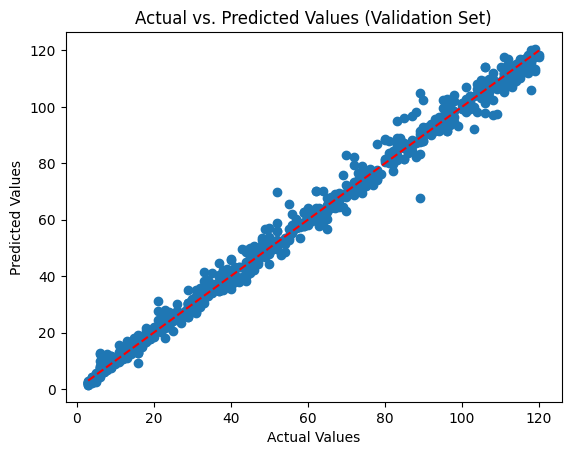

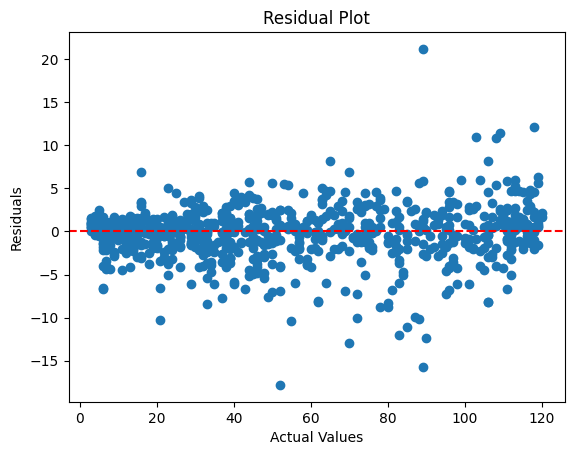

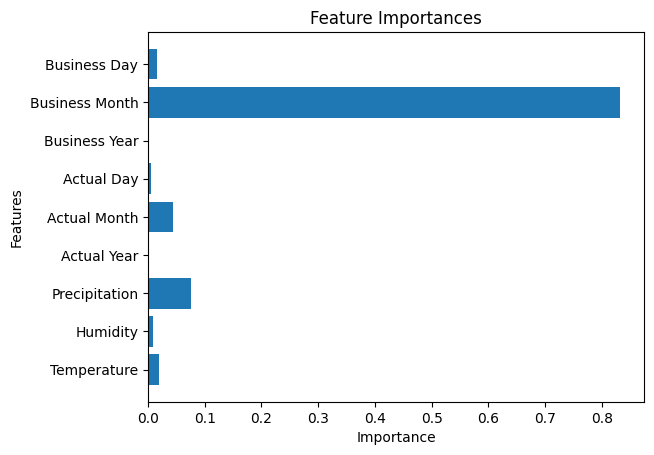

In [12]:
import matplotlib.pyplot as plt

# Plotting the predicted values vs. the actual values for the validation set
plt.scatter(y_test, y_val_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Validation Set)')
plt.show()

# Plotting the residuals
residuals = y_test - y_val_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plotting the feature importances
feature_importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Preprocessing
X = merged_df[['Actual Date', 'Business Date', 'Temperature', 'Humidity', 'Precipitation']].copy()
y = merged_df['Rooms Sold']

# Convert datetime columns to datetime type
X['Actual Date'] = pd.to_datetime(X['Actual Date'])
X['Business Date'] = pd.to_datetime(X['Business Date'])

# Extract additional features from datetime columns
X['Actual Year'] = X['Actual Date'].dt.year
X['Actual Month'] = X['Actual Date'].dt.month
X['Actual Day'] = X['Actual Date'].dt.day

X['Business Year'] = X['Business Date'].dt.year
X['Business Month'] = X['Business Date'].dt.month
X['Business Day'] = X['Business Date'].dt.day

# Drop the original datetime columns
X = X.drop(['Actual Date', 'Business Date'], axis=1)

# Splitting data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor Model
model = RandomForestRegressor()

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # Convert negative MSE scores to positive

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = model.predict(X_test)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluation and Performance Metrics for Validation Set
mse_val = mean_squared_error(y_test, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_test, y_val_pred)

# Evaluation and Performance Metrics for Test Set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Validation Set Metrics:")
print("Mean Squared Error (MSE):", mse_val)
print("Root Mean Squared Error (RMSE):", rmse_val)
print("R-squared (R2) Score:", r2_val)
print("")

print("Test Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R2) Score:", r2_test)
print("")

print("Cross-Validation Scores (Positive MSE):")
print(cv_scores)
print("Average Cross-Validation Score (Positive MSE):", np.mean(cv_scores))

Validation Set Metrics:
Mean Squared Error (MSE): 9.197550574712643
Root Mean Squared Error (RMSE): 3.0327463749401535
R-squared (R2) Score: 0.9928873380870596

Test Set Metrics:
Mean Squared Error (MSE): 9.197550574712643
Root Mean Squared Error (RMSE): 3.0327463749401535
R-squared (R2) Score: 0.9928873380870596

Cross-Validation Scores (Positive MSE):
[12.25024864 11.54649297 16.02330543  9.2409246  14.1386377 ]
Average Cross-Validation Score (Positive MSE): 12.639921869442702


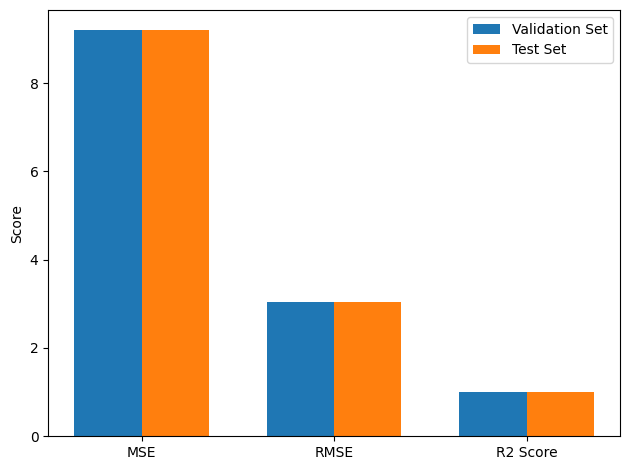

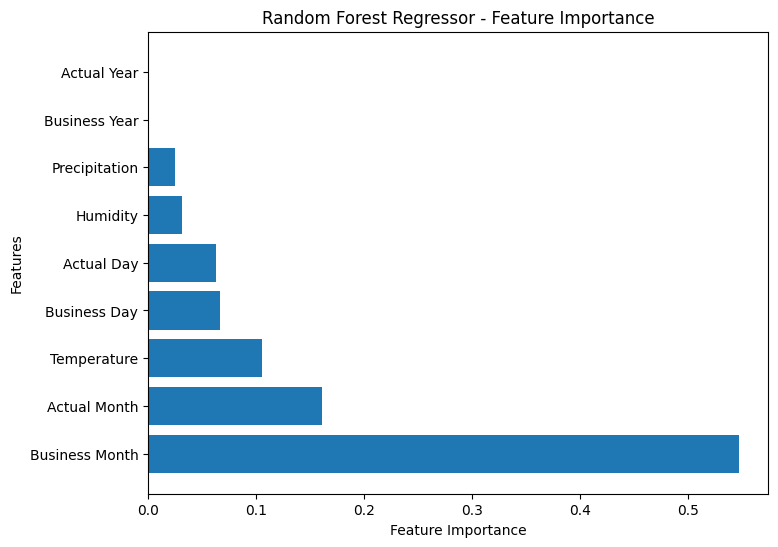

In [14]:
# Plotting Performance Metrics
labels = ['MSE', 'RMSE', 'R2 Score']
validation_scores = [mse_val, rmse_val, r2_val]
test_scores = [mse_test, rmse_test, r2_test]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, validation_scores, width, label='Validation Set')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test Set')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

# Plotting Feature Importance
feature_importance = model.feature_importances_
sorted_feature_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = X.columns[sorted_feature_indices]
sorted_feature_importance = feature_importance[sorted_feature_indices]

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regressor - Feature Importance')

plt.show()